Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [1]:
import itertools
import random
from collections import Counter
import re

import pymysql
import sqlite3
import getpass

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

%matplotlib inline

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [3]:
pd_zoo = pd.read_csv('../Dados/zoo.csv')
pd_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [4]:
pd_zoo['animal']

0      aardvark
1      antelope
2          bass
3          bear
4          boar
5       buffalo
6          calf
7          carp
8       catfish
9          cavy
10      cheetah
11      chicken
12         chub
13         clam
14         crab
15     crayfish
16         crow
17         deer
18      dogfish
19      dolphin
20         dove
21         duck
22     elephant
23     flamingo
24         flea
25         frog
26         frog
27     fruitbat
28      giraffe
29         girl
         ...   
71         rhea
72     scorpion
73     seahorse
74         seal
75      sealion
76     seasnake
77      seawasp
78      skimmer
79         skua
80     slowworm
81         slug
82         sole
83      sparrow
84     squirrel
85     starfish
86     stingray
87         swan
88      termite
89         toad
90     tortoise
91      tuatara
92         tuna
93      vampire
94         vole
95      vulture
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal, Length: 10

2 - Transforme os campos com as strings "True"/"False" em variáveis booleanas True/False  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://stackoverflow.com/questions/49259580/replace-values-in-a-pandas-series-via-dictionary-efficiently)

3 - Crie um novo dataframe somente com os Mamíferos

In [10]:
pd_zoo[pd_zoo.type.str.startswith('mammal')]

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
6,calf,True,False,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
9,cavy,True,False,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal
10,cheetah,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
17,deer,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
19,dolphin,False,False,False,True,False,True,True,True,True,True,False,True,0,True,False,True,mammal


4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)  

In [18]:
x=pd_zoo['animal']
x

0      aardvark
1      antelope
2          bass
3          bear
4          boar
5       buffalo
6          calf
7          carp
8       catfish
9          cavy
10      cheetah
11      chicken
12         chub
13         clam
14         crab
15     crayfish
16         crow
17         deer
18      dogfish
19      dolphin
20         dove
21         duck
22     elephant
23     flamingo
24         flea
25         frog
26         frog
27     fruitbat
28      giraffe
29         girl
         ...   
71         rhea
72     scorpion
73     seahorse
74         seal
75      sealion
76     seasnake
77      seawasp
78      skimmer
79         skua
80     slowworm
81         slug
82         sole
83      sparrow
84     squirrel
85     starfish
86     stingray
87         swan
88      termite
89         toad
90     tortoise
91      tuatara
92         tuna
93      vampire
94         vole
95      vulture
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal, Length: 10

NameError: name 'plot' is not defined

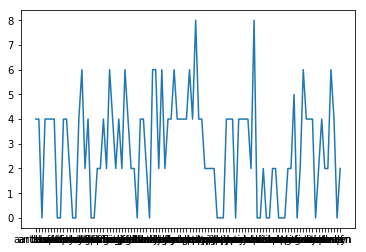

In [19]:
x=pd_zoo['animal']
y=pd_zoo['legs']
plt.plot(x,y)
plot.show()

5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [ ]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='alunos')

### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

1 - Ordene as palavras do texto nas formas abaixo:
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

2 - Quantas palavras maiúsculas distintas há no texto?

3 - Quantas palavras há com apenas uma, com apenas duas, e com apenas 3 vogais?

4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

### Parte 3 - Expressões Regulares

1 - Repita os exercícios 1 a 4 da parte 2 utilizando Python

### Parte 4 - Bancos de dados

In [8]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

········


In [11]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('account',)
('branch',)
('business',)
('customer',)
('department',)
('employee',)
('individual',)
('officer',)
('product',)
('product_type',)
('transaction',)


In [12]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

('account_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('product_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('cust_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('open_date', 'date', 'NO', '', None, '')
('close_date', 'date', 'YES', '', None, '')
('last_activity_date', 'date', 'YES', '', None, '')
('status', "enum('ACTIVE','CLOSED','FROZEN')", 'YES', '', None, '')
('open_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('open_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('avail_balance', 'float(10,2)', 'YES', '', None, '')
('pending_balance', 'float(10,2)', 'YES', '', None, '')


In [13]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(3, 'CD', 1, datetime.date(2004, 6, 30), None, datetime.date(2004, 6, 30), 'ACTIVE', 2, 10, 3000.0, 3000.0)
(4, 'CHK', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 27), 'ACTIVE', 2, 10, 2258.02, 2258.02)
(5, 'SAV', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 11), 'ACTIVE', 2, 10, 200.0, 200.0)


In [14]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


In [15]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None)
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None)
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None)
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None)


In [16]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

('product_type_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')


In [17]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

('ACCOUNT', 'Customer Accounts')
('INSURANCE', 'Insurance Offerings')
('LOAN', 'Individual and Business Loans')


In [18]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [19]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)
(5, 'John', 'Gooding', datetime.date(2003, 11, 14), None, 4, 2, 'Loan Manager', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(10, 'Paula', 'Roberts', datetime.date(2002, 7, 27), None, 4, 1, 'Head Teller', 2)


1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

5 - Quantos empregados ("employees") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

6 - Quais são os títulos ("title") possíveis para os empregados ("employees")? 

7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "Alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"  

12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [5]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
id,,,,,
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush


14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [6]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [ ]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()